<img src="static/photo2map.jpg" width=700 align="center"/>

# Photo -> Map
Disclaimer: this notebook is an adopted version of [this repository](https://github.com/GunhoChoi/Kind-PyTorch-Tutorial).

Previously, we used neural networks for **sparse** predictions: large input (image) -> small output (vector with 10 elements, e.g. CIFAR10 classes). Today we'll use deep learning to make **dense** predictions (large input (image) -> large output (image)) for **image-to-image translation problem**. *Image-to-image translation* is a wide class of problems, where input is image and output is image too (e.g. satellite photo -> map, image stylization, [sketch -> cat portrait](https://affinelayer.com/pixsrv/),  etc...). There many good models for dense predictions, but we'll use **UNet** as the best choice in terms of simplicity-quality ratio.

But before we start, let's look at our dataset.

## Task 1 (1 point). Dataset
We'll dataset of pairs **satellite photo - map** (example is above). To download dataset, uncomment and run command below:

In [2]:
! wget https://people.eecs.berkeley.edu/~tinghuiz/projects/pix2pix/datasets/maps.tar.gz
! tar -xzvf maps.tar.gz
! mkdir maps/train/0 && mv maps/train/*.jpg maps/train/0
! mkdir maps/val/0 && mv maps/val/*.jpg maps/val/0

--2019-03-05 18:38:53--  https://people.eecs.berkeley.edu/~tinghuiz/projects/pix2pix/datasets/maps.tar.gz
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.189.73
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.189.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250242400 (239M) [application/x-gzip]
Saving to: ‘maps.tar.gz’

maps.tar.gz         100%[===================>] 238.65M  5.71MB/s    in 47s     

2019-03-05 18:39:41 (5.07 MB/s) - ‘maps.tar.gz’ saved [250242400/250242400]

maps/
maps/train/
maps/train/1.jpg
maps/train/10.jpg
maps/train/100.jpg
maps/train/1000.jpg
maps/train/1001.jpg
maps/train/1002.jpg
maps/train/1003.jpg
maps/train/1004.jpg
maps/train/1005.jpg
maps/train/1006.jpg
maps/train/1007.jpg
maps/train/1008.jpg
maps/train/1009.jpg
maps/train/101.jpg
maps/train/1010.jpg
maps/train/1011.jpg
maps/train/1012.jpg
maps/train/1013.jpg
maps/train/1014.jpg
maps/train/1015.jpg
maps/train/530.jpg
maps/trai

maps/train/504.jpg
maps/train/505.jpg
maps/train/506.jpg
maps/train/507.jpg
maps/train/508.jpg
maps/train/142.jpg
maps/train/143.jpg
maps/train/144.jpg
maps/train/145.jpg
maps/train/146.jpg
maps/train/147.jpg
maps/train/148.jpg
maps/train/149.jpg
maps/train/15.jpg
maps/train/150.jpg
maps/train/151.jpg
maps/train/152.jpg
maps/train/153.jpg
maps/train/154.jpg
maps/train/155.jpg
maps/train/156.jpg
maps/train/157.jpg
maps/train/158.jpg
maps/train/159.jpg
maps/train/16.jpg
maps/train/160.jpg
maps/train/161.jpg
maps/train/162.jpg
maps/train/163.jpg
maps/train/164.jpg
maps/train/165.jpg
maps/train/166.jpg
maps/train/167.jpg
maps/train/168.jpg
maps/train/169.jpg
maps/train/17.jpg
maps/train/170.jpg
maps/train/171.jpg
maps/train/954.jpg
maps/train/955.jpg
maps/train/956.jpg
maps/train/957.jpg
maps/train/958.jpg
maps/train/959.jpg
maps/train/96.jpg
maps/train/960.jpg
maps/train/961.jpg
maps/train/962.jpg
maps/train/963.jpg
maps/train/964.jpg
maps/train/965.jpg
maps/train/966.jpg
maps/train/967.j

maps/train/1060.jpg
maps/train/1061.jpg
maps/train/1062.jpg
maps/train/1063.jpg
maps/train/1064.jpg
maps/train/1065.jpg
maps/train/1066.jpg
maps/train/1067.jpg
maps/train/1068.jpg
maps/train/1069.jpg
maps/train/107.jpg
maps/train/1070.jpg
maps/train/1071.jpg
maps/train/1072.jpg
maps/train/1073.jpg
maps/train/1074.jpg
maps/train/1075.jpg
maps/train/1076.jpg
maps/train/1077.jpg
maps/train/1078.jpg
maps/train/1079.jpg
maps/train/108.jpg
maps/train/98.jpg
maps/train/980.jpg
maps/train/981.jpg
maps/train/982.jpg
maps/train/983.jpg
maps/train/984.jpg
maps/train/985.jpg
maps/train/986.jpg
maps/train/987.jpg
maps/train/988.jpg
maps/train/989.jpg
maps/train/99.jpg
maps/train/990.jpg
maps/train/991.jpg
maps/train/992.jpg
maps/train/993.jpg
maps/train/994.jpg
maps/train/995.jpg
maps/train/996.jpg
maps/train/997.jpg
maps/train/998.jpg
maps/train/999.jpg
maps/train/780.jpg
maps/train/781.jpg
maps/train/782.jpg
maps/train/783.jpg
maps/train/784.jpg
maps/train/785.jpg
maps/train/786.jpg
maps/train/78

maps/val/267.jpg
maps/val/268.jpg
maps/val/269.jpg
maps/val/27.jpg
maps/val/270.jpg
maps/val/271.jpg
maps/val/272.jpg
maps/val/273.jpg
maps/val/274.jpg
maps/val/275.jpg
maps/val/276.jpg
maps/val/277.jpg
maps/val/278.jpg
maps/val/279.jpg
maps/val/28.jpg
maps/val/280.jpg
maps/val/281.jpg
maps/val/282.jpg
maps/val/283.jpg
maps/val/284.jpg
maps/val/285.jpg
maps/val/286.jpg
maps/val/287.jpg
maps/val/288.jpg
maps/val/289.jpg
maps/val/29.jpg
maps/val/290.jpg
maps/val/291.jpg
maps/val/713.jpg
maps/val/714.jpg
maps/val/715.jpg
maps/val/716.jpg
maps/val/717.jpg
maps/val/718.jpg
maps/val/719.jpg
maps/val/72.jpg
maps/val/720.jpg
maps/val/721.jpg
maps/val/722.jpg
maps/val/723.jpg
maps/val/724.jpg
maps/val/725.jpg
maps/val/726.jpg
maps/val/727.jpg
maps/val/728.jpg
maps/val/729.jpg
maps/val/73.jpg
maps/val/730.jpg
maps/val/731.jpg
maps/val/732.jpg
maps/val/733.jpg
maps/val/49.jpg
maps/val/490.jpg
maps/val/491.jpg
maps/val/492.jpg
maps/val/493.jpg
maps/val/494.jpg
maps/val/495.jpg
maps/val/496.jpg
map

maps/val/363.jpg
maps/val/364.jpg
maps/val/365.jpg
maps/val/366.jpg
maps/val/367.jpg
maps/val/368.jpg
maps/val/369.jpg
maps/val/37.jpg
maps/val/370.jpg
maps/val/371.jpg
maps/val/372.jpg
maps/val/118.jpg
maps/val/119.jpg
maps/val/12.jpg
maps/val/120.jpg
maps/val/121.jpg
maps/val/122.jpg
maps/val/123.jpg
maps/val/124.jpg
maps/val/125.jpg
maps/val/126.jpg
maps/val/127.jpg
maps/val/128.jpg
maps/val/129.jpg
maps/val/13.jpg
maps/val/130.jpg
maps/val/131.jpg
maps/val/132.jpg
maps/val/133.jpg
maps/val/134.jpg
maps/val/135.jpg
maps/val/136.jpg
maps/val/137.jpg
maps/val/138.jpg
maps/val/139.jpg
maps/val/14.jpg
maps/val/1060.jpg
maps/val/1061.jpg
maps/val/1062.jpg
maps/val/1063.jpg
maps/val/1064.jpg
maps/val/1065.jpg
maps/val/1066.jpg
maps/val/1067.jpg
maps/val/1068.jpg
maps/val/1069.jpg
maps/val/107.jpg
maps/val/1070.jpg
maps/val/1071.jpg
maps/val/1072.jpg
maps/val/1073.jpg
maps/val/1074.jpg
maps/val/1075.jpg
maps/val/1076.jpg
maps/val/1077.jpg
maps/val/1078.jpg
maps/val/1079.jpg
maps/val/108.jp

Imports:

In [3]:
import os
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

import torch
from torch import nn
from torch.utils.data import DataLoader
import torch.nn.functional as F

import torchvision
from torchvision import transforms


Parameters:

In [4]:
experiment_title = "unet"

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

batch_size = 4
image_size = 256

data_dir = "./maps"

transform = transforms.Compose([
    transforms.Resize(size=image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

After downloading and unpacking you'll find directory `maps` with 2 subdirectories: `train` and `val`. Each image is a pair (photo - map), so we'll have to **crop image to obtain input and target**. Let's use PyTorch's [ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.ImageFolder) dataloader: 

In [35]:
train_dataset = torchvision.datasets.ImageFolder(os.path.join(data_dir, "train"), transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

Draw sample from dataset:

In [6]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    img = img.cpu().numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

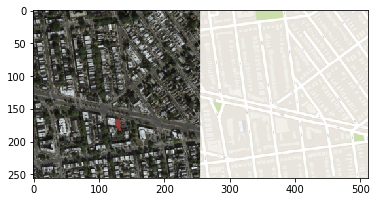

In [7]:
(image, _) = train_dataset[0]
imshow(image)

As we can see input and target are in the same image. Let's write wrapper of ImageFolder to return what we need:

In [8]:
! ls maps/train/0 | head

1.jpg
10.jpg
100.jpg
1000.jpg
1001.jpg
1002.jpg
1003.jpg
1004.jpg
1005.jpg
1006.jpg


In [9]:
class PhotoMapDataset(torchvision.datasets.ImageFolder):
    def __getitem__(self, index):
        path, _ = self.samples[index]
        sample = self.loader(path)
        
        if self.transform is not None:
            sample = self.transform(sample)
        
        photo_image, map_image = torch.chunk(sample, 2, dim=-1)
        
        return photo_image, map_image

So now we have:

In [36]:
train_dataset = PhotoMapDataset(root=os.path.join(data_dir, "train"), transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

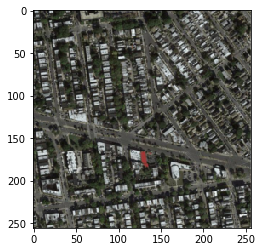

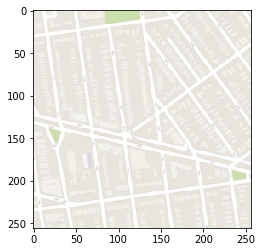

In [11]:
photo_image, map_image = train_dataset[0]
imshow(photo_image)
imshow(map_image)

Okay, we're don with data. Let's move to defining model.

## Task 2 (2 ponts). UNet
UNet is a very popular fully-convolutional architecture. Below you can find its sctructure (for more detatils refer to [original paper](https://arxiv.org/abs/1505.04597)):

<img src="static/unet.png" width=1000 align="center"/>

Let's build UNet!

In [12]:
class UnetDownBlock(nn.Module):
    def __init__(self, in_channels, out_channels, pooling=True):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.pooling = pooling
        
        # your code here
        self.conv1 = nn.Conv2d(in_channels, out_channels, 3, padding=1)
        self.conv2 = nn.Conv2d(out_channels, out_channels, 3, padding=1)
        self.pool = nn.MaxPool2d(2)
        
    def forward(self, x):
        
        # your code here
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        
        x_before_pooling = x
        
        if self.pooling:
            x = self.pool(x)
        
        return x, x_before_pooling

In [13]:
x = torch.rand(5, 3, 256, 256)
l = nn.ConvTranspose2d(3, 3, kernel_size=2, stride=2, padding=0)

l(x).shape

torch.Size([5, 3, 512, 512])

In [14]:
class UnetUpBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        
        # your code here
        self.in_channels = in_channels
        self.out_channels = out_channels
        
        self.up_conv = nn.ConvTranspose2d(in_channels, out_channels, 2, stride=2)
        
        self.convs = nn.Sequential(
            nn.Conv2d(2 * out_channels, out_channels, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.ReLU(inplace=True),
        )
        
                
    def forward(self, x, x_bridge):
        
        # your code here
        x = F.relu(self.up_conv(x))
        x = torch.cat([x_bridge, x], dim=1)
        x = self.convs(x)
        
        return x

In [15]:
# class Unet(nn.Module):
#     def __init__(self, in_channels, out_channels, depth=3, base_n_filters=64):
#         super().__init__()
        
#         # your code here
#         self.in_channels = in_channels
#         self.out_channels = out_channels
#         self.depth = depth
#         self.base_n_filters = base_n_filters
        
#         # down
#         self.net = [UnetDownBlock(in_channels, out_channels) for step in range(depth - 1)]
#         self.net.append(UnetDownBlock(in_channels, out_channels, False))
    
#         # up
#         self.net.extend([UnetDownBlock(in_channels, out_channels) for step in range(depth)])
        
#         self.net = nn.Sequential(*self.net)
        
        
#     def forward(self, x):
        
#         # your code here
#         x = self.net(x)
        
#         return x
    
#     def __repr__(self):
#         message = '{}(in_channels={}, out_channels={}, depth={}, base_n_filters={})'.format(
#             self.__class__.__name__,
#             self.in_channels, self.out_channels, self.depth, self.base_n_filters
#         )
#         return message



class Unet(nn.Module):
    def __init__(self, in_channels, out_channels, depth=3, base_n_filters=64):
        super().__init__()

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.depth = depth
        self.base_n_filters = base_n_filters

        down_blocks = []
        for i in range(depth):
            current_in_channels = in_channels if i == 0 else current_out_channels
            current_out_channels = base_n_filters * (2 ** i)
            pooling = False if i == depth - 1 else True

            down_block = UnetDownBlock(current_in_channels, current_out_channels, pooling=pooling)
            down_blocks.append(down_block)

        up_blocks = []
        for i in range(depth - 1):
            current_in_channels = current_out_channels
            current_out_channels = current_in_channels // 2

            up_block = UnetUpBlock(current_in_channels, current_out_channels)
            up_blocks.append(up_block)

        self.down_blocks = nn.ModuleList(down_blocks)
        self.up_blocks = nn.ModuleList(up_blocks)

        self.conv_final = nn.Conv2d(current_out_channels, out_channels, kernel_size=(1, 1), stride=1, padding=0)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x_bridges = []
        for i in range(self.depth):
            x, x_bridge = self.down_blocks[i](x)
            if i != self.depth - 1:
                x_bridges.append(x_bridge)

        for i in range(self.depth - 1):
            x = self.up_blocks[i](x, x_bridges[-i - 1])

        x = self.conv_final(x)
        x = self.sigmoid(x)
        return x

    def __repr__(self):
        message = '{}(in_channels={}, out_channels={}, depth={}, base_n_filters={})'.format(
            self.__class__.__name__,
            self.in_channels, self.out_channels, self.depth, self.base_n_filters
        )
        return message

In [38]:
model = Unet(3, 3, depth=4, base_n_filters=64).to(device)
model

Unet(in_channels=3, out_channels=3, depth=4, base_n_filters=64)

## Train-loop

Optimization setup:

In [39]:
criterion = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr=0.0002)

TensorboardX setup:

In [40]:
# !pip install tensorboardx

In [41]:
from tensorboardX import SummaryWriter
from datetime import datetime

experiment_name = "{}@{}".format(experiment_title, datetime.now().strftime("%d.%m.%Y-%H:%M:%S"))
writer = SummaryWriter(log_dir=os.path.join("./tb", experiment_name))

Train-loop:

In [42]:
n_epochs = 10
n_iters_total = 0

for epoch in range(n_epochs):
    for batch in tqdm(train_dataloader):
        # unpack batch
        photo_image_batch, map_image_batch = batch
        photo_image_batch, map_image_batch = photo_image_batch.to(device), map_image_batch.to(device)
        
        # forward
        map_image_pred_batch = model(photo_image_batch)
        loss = criterion(map_image_pred_batch, map_image_batch)
        
        # optimize
        opt.zero_grad()
        loss.backward()
        opt.step()
        
        # dump statistics
        writer.add_scalar("train/loss", loss.item(), global_step=n_iters_total)
        
        if n_iters_total % 50 == 0:
            writer.add_image('train/photo_image', torchvision.utils.make_grid(photo_image_batch, normalize=True, scale_each=True), n_iters_total)
            writer.add_image('train/map_image_pred', torchvision.utils.make_grid(map_image_pred_batch, normalize=True, scale_each=True), n_iters_total)
            writer.add_image('train/map_image_gt', torchvision.utils.make_grid(map_image_batch, normalize=True, scale_each=True), n_iters_total)
        
        n_iters_total += 1
        
    print("Epoch {} done.".format(epoch))


Epoch 0 done.



Epoch 1 done.



Epoch 2 done.



Epoch 3 done.



Epoch 4 done.



Epoch 5 done.



Epoch 6 done.



Epoch 7 done.



Epoch 8 done.



Epoch 9 done.


## Run tensorboard

To look at your logs in tensorboard go to terminal and run command:
```bash
$ tensorboard --logdir PATH_TO_YOUR_LOG_DIR
```

Then go to browser to `localhost:6006` and you'll see beautiful graphs! Always use tensorbord to watch your experiment, because it's very important to check how training is going on.

## Task 3 (1 point). Validation

As you remember we have `val` images in our dataset. So, to make sure, that we didn't overfit to `train`, we should do evaluation on validation set. You're free to choose, how to insert validation in existing notebook:
1. Insert validation to train-loop (validate every epoch)
2. Validate 1 time after training

I highly recomend to implement first option with beautiful tensorboard logs. Have fun! :)

In [43]:
val_dataset = torchvision.datasets.ImageFolder(os.path.join(data_dir, "val"), transform=transform)
val_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

In [44]:
val_dataset = PhotoMapDataset(root=os.path.join(data_dir, "train"), transform=transform)
val_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

In [45]:
photo_image_batch, map_image_batch = next(iter(val_dataloader))
photo_image_batch, map_image_batch = photo_image_batch.to(device), map_image_batch.to(device)

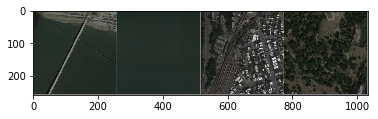

In [46]:
# Printing origin
imshow(torchvision.utils.make_grid(photo_image_batch))

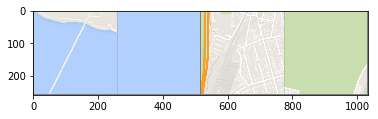

In [47]:
# Printin ground truth
imshow(torchvision.utils.make_grid(map_image_batch))

In [51]:
outputs = model(photo_image_batch)

In [49]:
predicted = torch.argmax(outputs, dim=1)

In [52]:
imshow(torchvision.utils.make_grid(predicted))

RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.